In [18]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 3

%matplotlib inline

# 第1章

In [2]:
sp.stats.binom.pmf(k=1, n=2, p=0.5)

0.5

In [3]:
np.random.seed(1)
sp.stats.binom.rvs(n=10, p=0.2, size=5)

array([2, 3, 0, 1, 1])

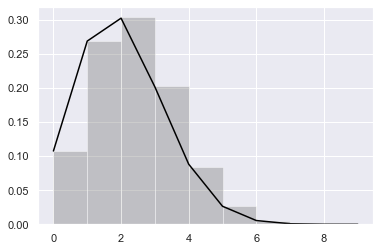

In [4]:
binomial = sp.stats.binom(n=10, p=0.2)

np.random.seed(1)
rvs_binomial = binomial.rvs(size=10000)

m = np.arange(0, 10, 1)
pmf_binomial = binomial.pmf(k=m)

sns.distplot(rvs_binomial, bins=m, kde=False,
            norm_hist=True, color="gray")
plt.plot(m, pmf_binomial, color="black")

In [5]:
sp.stats.poisson.pmf(k=2, mu=5)

0.08422433748856832

In [8]:
np.random.seed(1)
sp.stats.poisson.rvs(mu=2, size=5)

array([2, 1, 0, 1, 2])

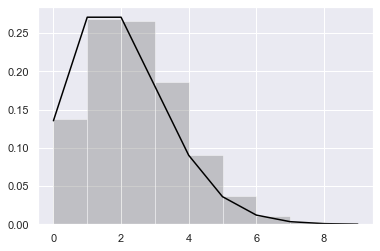

In [9]:
poisson = sp.stats.poisson(mu=2)

np.random.seed(1)
rvs_poisson = poisson.rvs(size=10000)

pmf_poisson = poisson.pmf(k=m)

sns.distplot(rvs_poisson, bins=m, kde=False,
            norm_hist=True, color="gray")
plt.plot(m, pmf_poisson, color="black")

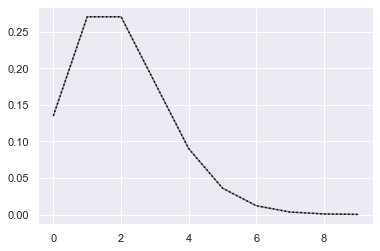

In [11]:
N = 100000000
p = 0.00000002
binomial_2 = sp.stats.binom(n=N, p=p)

pmf_binomial_2 = binomial_2.pmf(k=m)

plt.plot(m, pmf_poisson, color="gray")
plt.plot(m, pmf_binomial_2, color="black",
        linestyle="dotted")

# 第3章

In [12]:
test_result = pd.read_csv("6-3-1-logistic-regression.csv")
test_result.head(3)

,hours,result
0,0,0
1,0,0
2,0,0


<AxesSubplot:xlabel='hours', ylabel='result'>

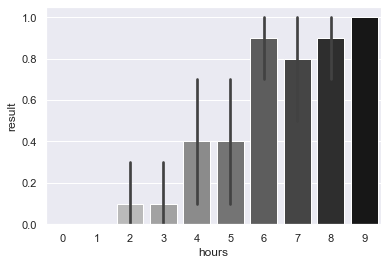

In [15]:
sns.barplot(x="hours", y="result",
           data=test_result, palette="gray_r")

In [16]:
test_result.groupby("hours").mean()

,result
hours,
0,0.0
1,0.0
2,0.1
3,0.1
4,0.4
5,0.4
6,0.9
7,0.8
8,0.9


In [20]:
mod_glm = smf.glm(formula="result ~ hours",
                 data=test_result,
                 family=sm.families.Binomial()).fit()

In [21]:
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Wed, 02 Sep 2020   Deviance:                       68.028
Time:                        00:24:45   Pearson chi2:                     84.9
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

In [22]:
mod_glm_null = smf.glm(
    "result ~ 1", data=test_result,
    family=sm.families.Binomial()).fit()

In [23]:
print("Nullモデル : ", mod_glm_null.aic.round(3))
print("変数入りモデル : ", mod_glm.aic.round(3))

Nullモデル :  139.989
変数入りモデル :  72.028


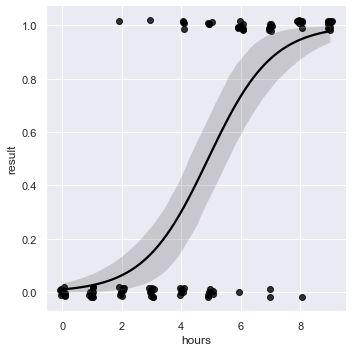

In [25]:
sns.lmplot(x="hours", y="result",
          data=test_result,
          logistic=True,
          scatter_kws={"color":"black"},
          line_kws={"color":"black"},
          x_jitter=0.1, y_jitter=0.02)

In [26]:
exp_val = pd.DataFrame({
    "hours": np.arange(0, 10, 1)
})
pred = mod_glm.predict(exp_val)
pred

0    0.010367
1    0.025836
2    0.062920
3    0.145291
4    0.300876
5    0.521427
6    0.733929
7    0.874741
8    0.946467
9    0.978147
dtype: float64

In [27]:
exp_val_1 = pd.DataFrame({"hours":[1]})
pred_1 = mod_glm.predict(exp_val_1)

exp_val_2 = pd.DataFrame({"hours":[2]})
pred_2 = mod_glm.predict(exp_val_2)

In [29]:
odds_1 = pred_1 / (1 - pred_1)
odds_2 = pred_2 / (1 - pred_2)

np.log(odds_2 / odds_1)

0    0.92889
dtype: float64

In [30]:
mod_glm.params["hours"]

0.9288901756284946

In [31]:
np.exp(mod_glm.params["hours"])

2.5316978778757737

# 第4章

In [35]:
pred = mod_glm.predict()

y = test_result.result

pearson_resid = (y - pred) / np.sqrt(pred * (1 - pred))
pearson_resid.head(3)

0   -0.102351
1   -0.102351
2   -0.102351
Name: result, dtype: float64

In [36]:
mod_glm.resid_pearson.head(3)

0   -0.102351
1   -0.102351
2   -0.102351
dtype: float64

In [37]:
np.sum(mod_glm.resid_pearson**2)

84.91138782569973

In [38]:
mod_glm.pearson_chi2

84.91138782569973

In [39]:
pred = mod_glm.predict()

y = test_result.result

resid_tmp = 0 - np.log(
    sp.stats.binom.pmf(k=y, n=1, p=pred))

deviance_resid = np.sqrt(
    2 * resid_tmp
) * np.sign(y - pred)

deviance_resid.head(3)

0   -0.144369
1   -0.144369
2   -0.144369
Name: result, dtype: float64

In [40]:
mod_glm.resid_deviance.head(3)

0   -0.144369
1   -0.144369
2   -0.144369
dtype: float64

In [41]:
np.sum(mod_glm.resid_deviance ** 2)

68.02788118117269

In [42]:
beer = pd.read_csv("6-5-1-poisson-regression.csv")
beer.head(3)

,beer_number,temperature
0,6,17.5
1,11,26.6
2,2,5.0


In [43]:
mod_pois = smf.glm("beer_number ~ temperature", beer,
                  family=sm.families.Poisson()).fit()
mod_pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            beer_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.672
Date:                Wed, 02 Sep 2020   Deviance:                       5.1373
Time:                        00:47:28   Pearson chi2:                     5.40
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4476      0.199      2.253      0.024       0.058       0.837
temperature     0.0761      0.008      9.784      0.000       0.061       0.091
===============================================================================
"""

In [44]:
mod_pois_null = smf.glm(
    "beer_number ~ 1", data = beer,
    family=sm.families.Poisson()).fit()

In [45]:
print("Nullモデル : ", mod_pois_null.aic.round(3))
print("変数入りモデル : ", mod_pois.aic.round(3))

Nullモデル :  223.363
変数入りモデル :  119.343


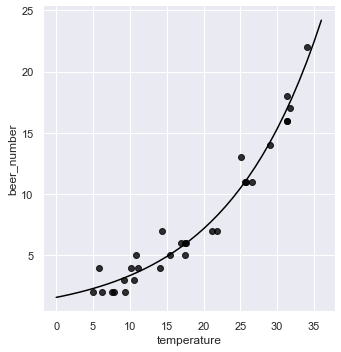

In [46]:
x_plot = np.arange(0, 37)
pred = mod_pois.predict(
    pd.DataFrame({"temperature": x_plot}))

sns.lmplot(y="beer_number", x="temperature",
          data=beer, fit_reg=False,
          scatter_kws={"color":"black"})

plt.plot(x_plot, pred, color="black")

In [47]:
exp_val_1 = pd.DataFrame({"temperature": [1]})
pred_1 = mod_pois.predict(exp_val_1)

exp_val_2 = pd.DataFrame({"temperature": [2]})
pred_2 = mod_pois.predict(exp_val_2)

pred_2 / pred_1

0    1.079045
dtype: float64

In [ ]:
np.exp